In [17]:
from fastai.vision.all import *
import timm
from pathlib import Path
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
import sys
import albumentations as A
sys.path.append('/content/Endometrial-Hyperplasia')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from balance_dataset import balance_dataset
from augmentations import AlbumentationsTransform, get_albumentations
from dataloaders import dataloaders
from training.train_inceptionv3 import *

In [19]:
DATA_DIR = Path('/content/drive/MyDrive/eh_classification')

In [20]:
balance_dataset = balance_dataset(DATA_DIR, strategy='oversample')

Original class counts: {'Normal Endometrium': 1333, 'Endometrial Hyperplasia': 798}
Balanced dataset saved to: /content/balanced_data


In [21]:
import os

dataset_path = '/content/balanced_data'

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        file_count = 0
        for entry in os.listdir(class_path):
            if os.path.isfile(os.path.join(class_path, entry)):
                file_count += 1
        print(f"Class: {class_name}, Number of files: {file_count}")

Class: Normal Endometrium, Number of files: 2666
Class: Endometrial Hyperplasia, Number of files: 2666


In [27]:
import albumentations as A
transforms = AlbumentationsTransform(get_albumentations())

In [28]:
dls = dataloaders(balance_dataset, transforms)

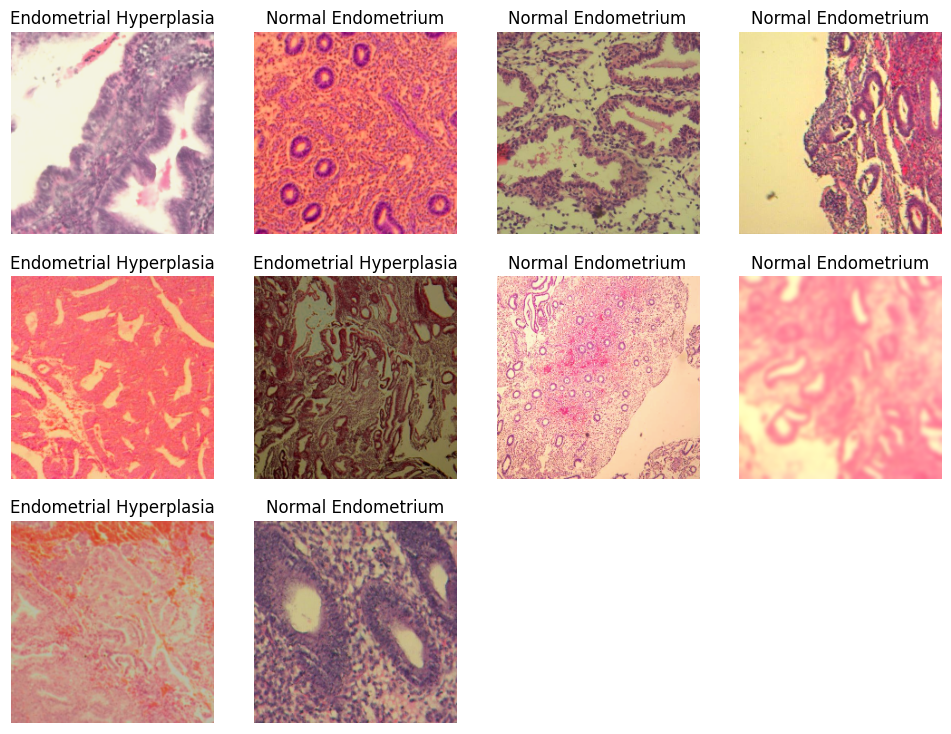

In [29]:
dls.show_batch(max_n=10)

In [30]:
metrics = [
    accuracy,
    Precision(average='macro'),
    Recall(average='macro'),
    F1Score(average='macro'),
    RocAucBinary(),
]

In [ ]:
learn = vision_learner(dls, resnet101, metrics=metrics).to_fp16()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0012022644514217973)

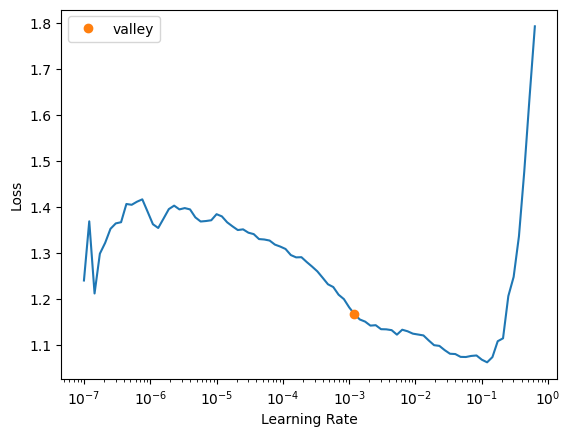

In [32]:
learn.lr_find()

In [33]:
learn.fit_one_cycle(20, 1e-3)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.958008,0.617399,0.730084,0.731134,0.730052,0.729759,0.800314,00:44
1,0.778989,0.498735,0.792877,0.793426,0.792857,0.792772,0.874244,00:44
2,0.669998,0.505720,0.816307,0.817457,0.816279,0.816132,0.881381,00:45
3,0.586845,0.434910,0.814433,0.814437,0.814435,0.814433,0.902168,00:45
4,0.496471,0.380904,0.831303,0.831605,0.831289,0.831260,0.915859,00:44
5,0.442607,0.356220,0.847235,0.847245,0.847238,0.847235,0.922873,00:44
6,0.396539,0.320463,0.858482,0.861304,0.858440,0.858195,0.936554,00:48
7,0.360636,0.300503,0.878163,0.879543,0.878135,0.878046,0.944217,00:45
8,0.338684,0.312335,0.868791,0.869130,0.868777,0.868758,0.944226,00:44
9,0.322799,0.286630,0.875351,0.875352,0.875352,0.875351,0.951539,00:46


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=2.0892961401841603e-05)

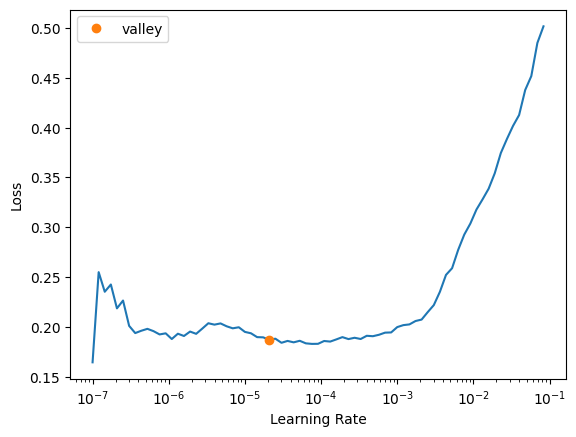

In [36]:
learn.unfreeze()
learn.lr_find()

In [37]:
learn.fit_one_cycle(20, 2.0892961401841603e-05)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.206408,0.187459,0.916589,0.916927,0.916575,0.916570,0.979882,00:45
1,0.207498,0.191660,0.917526,0.917822,0.917513,0.917509,0.978703,00:46
2,0.200623,0.186920,0.916589,0.916603,0.916586,0.916587,0.979571,00:47
3,0.185988,0.174182,0.925023,0.925124,0.925016,0.925018,0.982507,00:46
4,0.186114,0.170849,0.925023,0.925325,0.925011,0.925009,0.983213,00:45
5,0.166132,0.157179,0.932521,0.932921,0.932507,0.932504,0.986445,00:46
6,0.164838,0.150097,0.938144,0.938172,0.938141,0.938143,0.986723,00:47
7,0.163868,0.147902,0.941893,0.942109,0.941904,0.941887,0.987808,00:45
8,0.155740,0.144992,0.944705,0.944825,0.944713,0.944702,0.987894,00:45
9,0.146073,0.135132,0.941893,0.941987,0.941900,0.941891,0.989375,00:47


In [48]:
learn.export('resnet101.pkl')